---
title: "Global Influences on Cost of Living"
format:
  html:
    code-fold: true
    code-summary: "Show the code"
jupyter: python3
---

**Nicholas Johnson**

**8/2/2024**


# Introduction
## Overview
In an increasingly globalized world, the cost of living significantly varies across different countries, influenced by a variety of factors. Economic strength, cultural norms, and regional characteristics are just a few examples of contributing factors to living costs. This project focuses on the comparison of countries' Gross Domestic Product (GDP) per capita and their respective index scores for basic necessities. By examining these metrics, this project aims to uncover the underlying humanitarian implications of possible economic disparities.

## Research Questions
The primary focus of this project is to conduct a comparative analysis of GDP per capita and the Cost of Living Index across various countries. Additionally, GDP will be compared with other indices stored in the dataset to paint a larger picture. The core research questions are:

How does GDP per capita correlate with the Cost of Living Index across different countries?

* Are there outliers in this dataset - do certain countries have low GDPs with very high Cost of Living Index scores?

* What are the humanitarian impacts of high costs of living in countries with lower GDP per capita?

* What are the broader implications for global inequality and human well-being?

### Motivation
The motivation behind this study arises from growing global economic inequality and its effects on human well-being. The gap between wealthy and impoverished nations has continually widened, leading to significant differences in living standards. Understanding these disparities is vital for developing policies and interventions that can begin to balance this major discrepancy and improve living conditions worldwide. This project seeks to highlight specific countries existing as outliers, which present with high costs of living and low GDPs, and examine possible reasons for their struggles.

### Prior Related Work
Several studies have examined the relationship between GDP and cost of living, but not many have explored the humanitarian implications of this relationship. Previous research has primarily focused on economic indicators without considering the broader social and cultural factors that influence living costs. For instance, studies by the International Monetary Fund (IMF) and the World Bank have highlighted the correlation between GDP and living standards, but these analyses often lack a comprehensive view of how these economic metrics translate into everyday experiences for individuals. Additionally, by highlighting the outliers of the dataset, this project hopes to shed light on specific countries that are showing wide disparities in their GDP and cost of living index scores - which may highlight common factors among these struggling countries.

# Methods

### Data Sources

To conduct this analysis, two datasets were utilized:

1. Cost of Living Index by Country 2024:

* Source: Kaggle
* Description: This dataset provides various indices related to the cost of living for different countries. The indices include the Cost of Living Index, Rent Index, Groceries Index, Restaurant Price Index, and Local Purchasing Power Index.
2. GDP per Capita Data:

* Source: World Bank
* Description: This dataset provides GDP per capita data for countries worldwide. GDP per capita is a crucial economic indicator that reflects the average economic output per person and is commonly used to gauge the economic performance of a country.

### Data Preparation
The first step in the analysis is importing and cleaning the datasets. This involves several key tasks:

1. Importing Data:

* The datasets were imported into a Jupyter notebook using the Pandas library.
2. Data Cleaning:
* Missing Values: Missing values in both datasets were identified and handled appropriately. For the Cost of Living Index dataset, missing values were imputed or dropped based on the overall completeness of the data for each country. For the GDP per capita data, missing values were handled similarly.

3. Data Merging:

* The two datasets were merged on the country name to create a comprehensive dataset that included both the Cost of Living Index and GDP per capita for each country. This required the handling of country names to ensure consistency across both datasets. For example, some countries might be listed under different names or abbreviations in the two datasets, and these discrepancies were resolved through manual mapping.


### Exploratory Data Analysis (EDA)
With the data prepared, the next step was to conduct exploratory data analysis (EDA) to gain an initial understanding of the datasets and identify key trends and patterns. This involved obtaining summary statistics and creating compelling visualizations to help portray the narrative of the dataset. 

# Results

## Preparing the Data

In [3]:
import pandas as pd

# Load the datasets
file_path = 'data/Cost_of_Living_Index_by_Country_2024.csv'
df = pd.read_csv(file_path)

gdp_file_path = 'data/gdp-per-capita-worldbank.csv'
gdp_df = pd.read_csv(gdp_file_path)

# Filter GDP data for the most recent year
latest_year = gdp_df['Year'].max()
gdp_latest = gdp_df[gdp_df['Year'] == latest_year]

# Rename columns for clarity
gdp_latest = gdp_latest.rename(columns={'Entity': 'Country', 'GDP per capita, PPP (constant 2017 international $)': 'GDP per Capita'})

# Drop unnecessary columns
gdp_latest = gdp_latest[['Country', 'GDP per Capita']]

# Merge the GDP data with the Cost of Living Index dataset
df = pd.merge(df, gdp_latest, on='Country', how='left')
df.dropna(inplace=True)



# Display the first few rows of the dataset
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,GDP per Capita
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,72278.210
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,34663.496
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,55567.438
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,108036.110
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,15417.297


### Descriptive Statistics:

* Summary statistics, such as mean, median, standard deviation, and others, were calculated for both the Cost of Living Index and GDP per capita. These statistics provide a high-level overview of the data and help identify any outliers or anomalies.

In [12]:
print(df[['Cost of Living Index', 'GDP per Capita']].describe())

max_gdp_index = df['GDP per Capita'].idxmax()
min_gdp_index = df['GDP per Capita'].idxmin()
max_cost_index = df['Cost of Living Index'].idxmax()
min_cost_index = df['Cost of Living Index'].idxmin()

print("Highest GDP Country: " + str(df.loc[max_gdp_index, 'Country'] + ", GDP: " + str(df.loc[max_gdp_index, 'GDP per Capita'])))
print("Lowest GDP Country: " + str(df.loc[min_gdp_index, 'Country'] + ", GDP: " + str(df.loc[min_gdp_index, 'GDP per Capita'])))


print("Highest Cost of Living Index Country: " + str(df.loc[max_cost_index, 'Country'] + ", Cost of Living Index: " + str(df.loc[max_cost_index, 'GDP per Capita'])))

print("Lowest Cost of Living Index Country: " + str(df.loc[min_cost_index, 'Country'] + ", Cost of Living Index: " + str(df.loc[min_cost_index, 'Cost of Living Index'])))

       Cost of Living Index  GDP per Capita
count            111.000000      111.000000
mean              43.600901    29415.710221
std               16.448064    23866.345467
min               18.800000     1502.482200
25%               30.200000    11297.382000
50%               39.400000    22108.730000
75%               54.000000    44342.745000
max              101.100000   117746.990000
Highest GDP Country: Luxembourg, GDP: 117746.99
Lowest GDP Country: Madagascar, GDP: 1502.4822
Highest Cost of Living Index Country: Switzerland, Cost of Living Index: 72278.21
Lowest Cost of Living Index Country: Pakistan, Cost of Living Index: 18.8


As the cost of living index is normalized to NYC's cost of living, it is expected that near all values will be much lower than 100. From these summary statistics, we can observe that the median for the cost of living index is 39.4 and the median for the GDP per capita is 22,108. We may also observe that the highest GDP is found in Luxembourg, with a value of 117,746.99. The highest Cost of Living Index, on the other hand, is found in Switzerland, with a value of 101.10. The lowest GDP is found in Madagascar, with a starkly low value of 1502.48, and the lowest Cost of Living Index is found in Pakistan, with a value of 18.8.

These summary statistics provide a brief overview of the average and extremities within the dataset, and by further visualizing our data outliers can hopefully be extracted and possible reasons can be explored.

# Visualizations

### Histograms
 Histograms can help visualize the distribution of the Cost of Living Index and GDP per capita. This supports the identification of central tendencies and overall spread of the data.

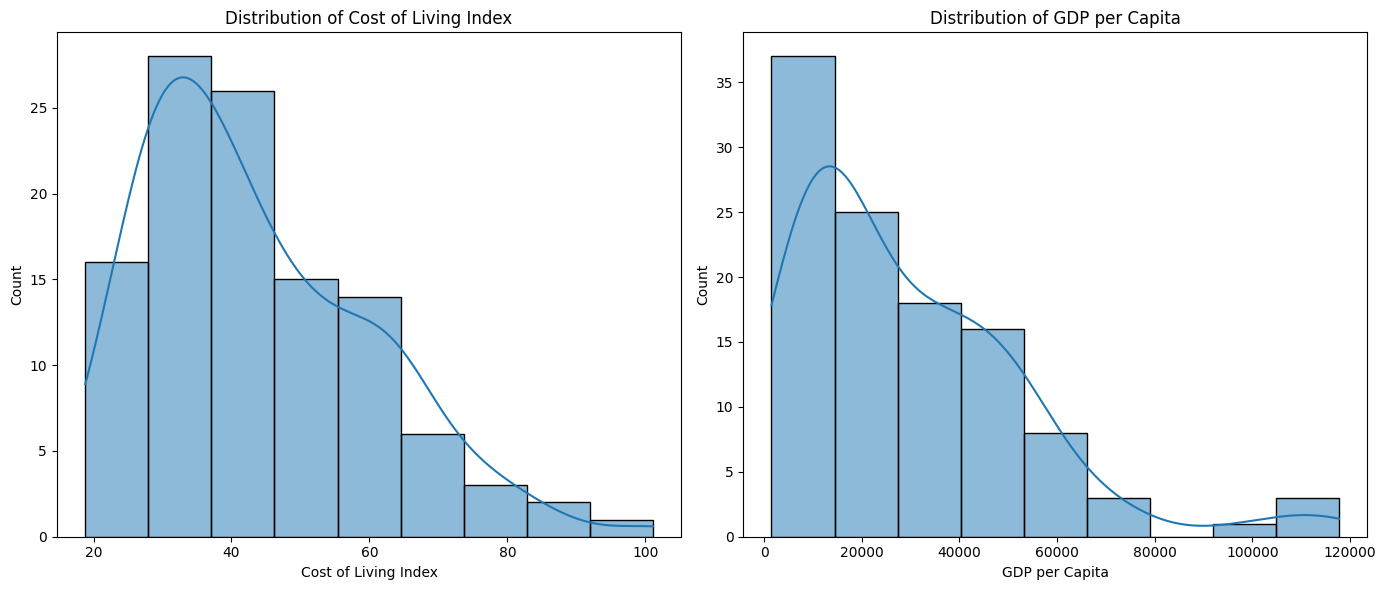

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Cost of Living Index'], kde=True)
plt.title('Distribution of Cost of Living Index')

plt.subplot(1, 2, 2)
sns.histplot(df['GDP per Capita'], kde=True)
plt.title('Distribution of GDP per Capita')

plt.tight_layout()
plt.show()

* The Cost of Living Index appears to be right-skewed, indicating that a few countries have very high living costs compared to the rest. The GDP per capita also shows a right-skewed distribution, suggesting that a few countries have significantly higher GDP per capita compared to others.

## Scatter Plot
A scatter plot can be utilized to examine the relationship between GDP per capita and the Cost of Living Index. This visual representation allows for the observation of any possible trends or correlations between GDP and Cost of Living Index.

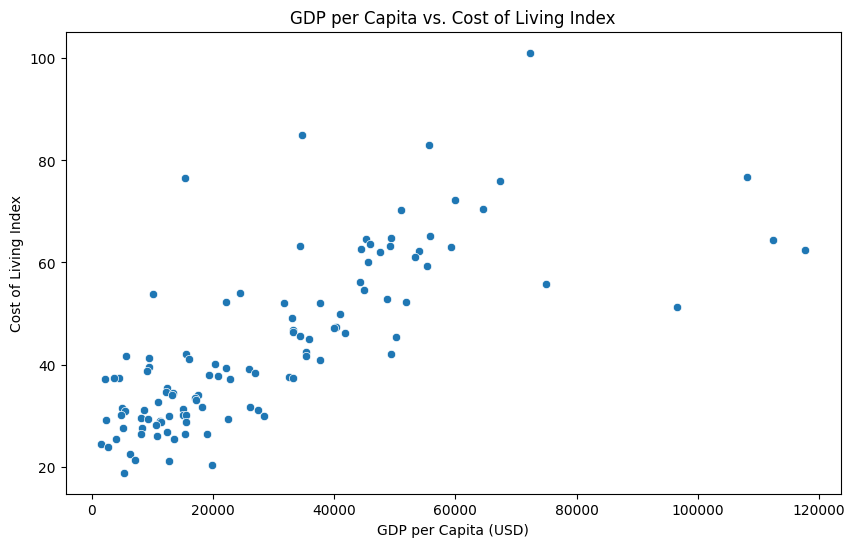

In [6]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per Capita', y='Cost of Living Index', data=df)
plt.title('GDP per Capita vs. Cost of Living Index')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Cost of Living Index')
plt.show()

* This plot immediately showns an overall linear trend between GDP and Cost of Living Index, but it also provides information about possible outliers in the dataset, showing certain countries with very high Cost of Living Index scores while still having relatively low GDP per Capita. To further support this analysis, we can compute the correlation score between GDP per Capita and the Cost of Living Index scores.

In [7]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['GDP per Capita'], df['Cost of Living Index'])
print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.2e}')

Correlation coefficient: 0.74
P-value: 7.33e-21


* The scatter plot and correlation score indicate a linear relationship between GDP per capita and the Cost of Living Index. This means that, generally, countries with higher GDP per capita tend to have a higher cost of living.

### Further Correlation Analysis
To observe further relationships in the dataset, we can utilize a correlation matrix heatmap and a pairplot to observe correlations across all features in our dataset. 

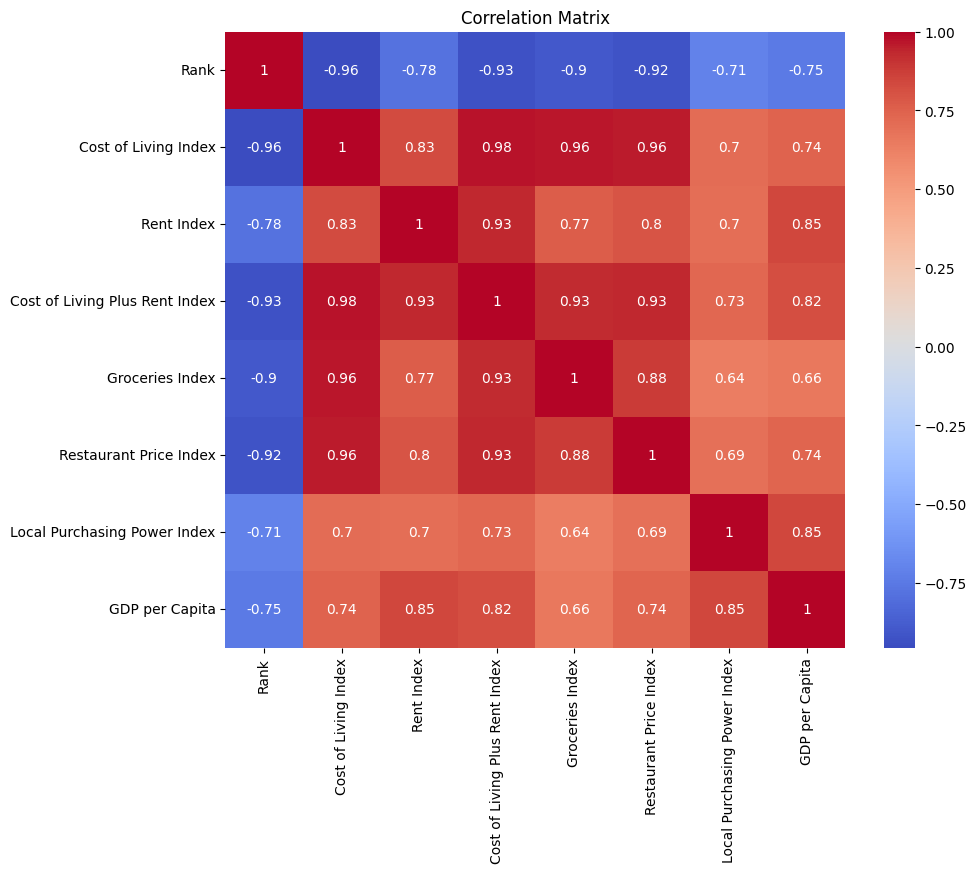

In [8]:
# Correlation matrix
correlation_matrix = df.loc[:, df.columns != 'Country'].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

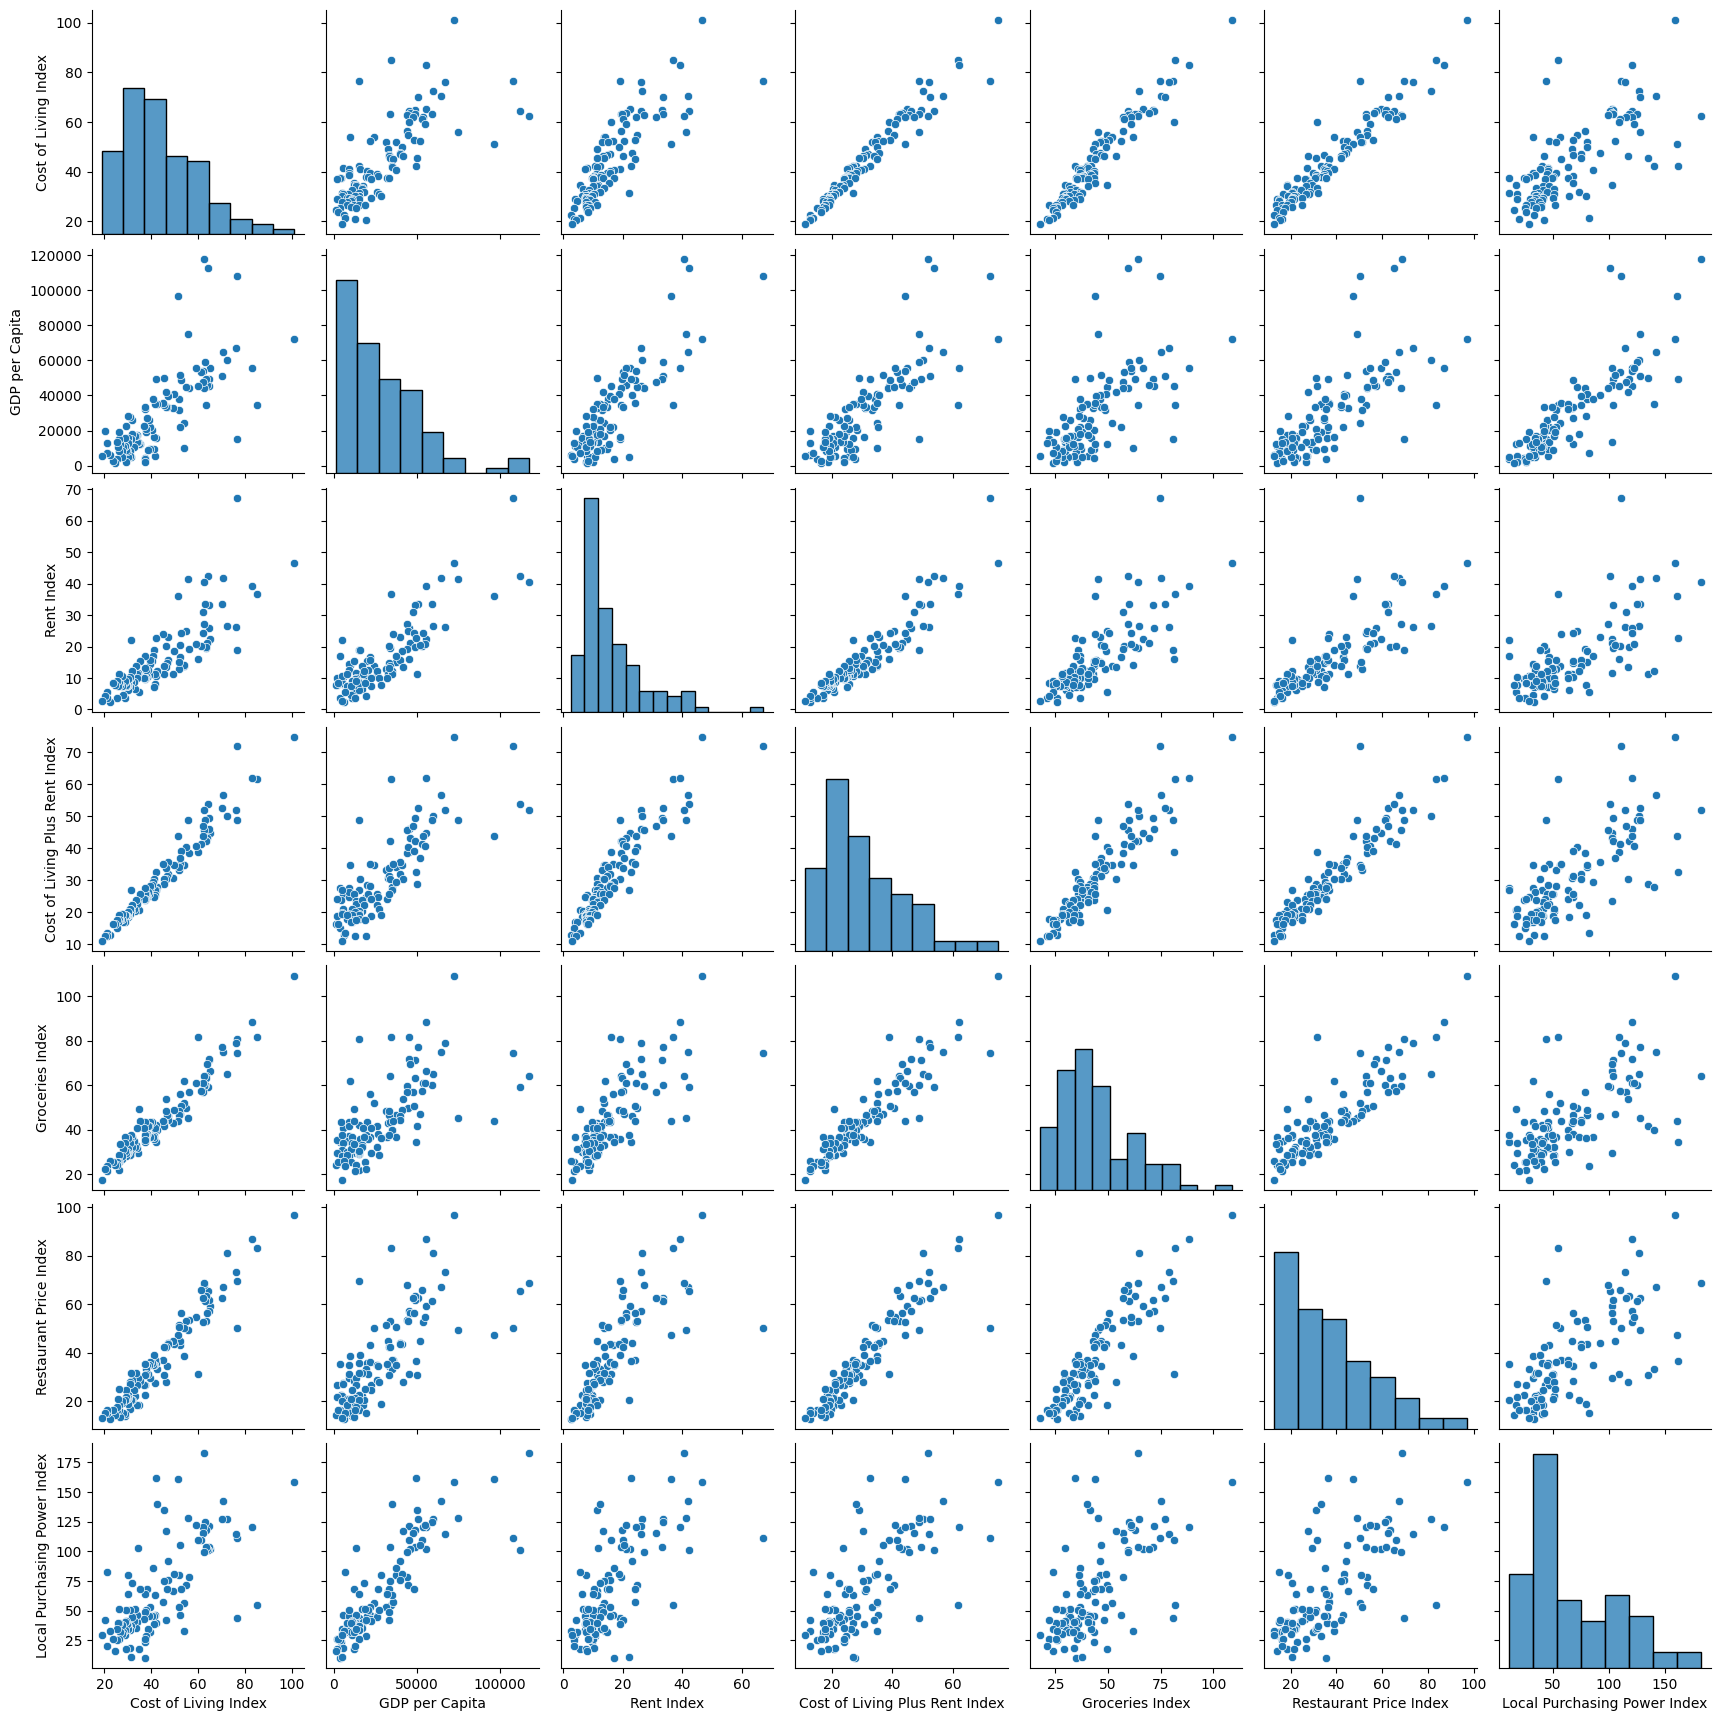

In [9]:
sns.pairplot(df[['Cost of Living Index', 'GDP per Capita', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']])

* From these plots, it is made clear that GDP seems to correlate highly with all cost indices within our dataset. This further supports the idea that the overall cost for basic necessities, aka Cost of Living, is higher in countries with larger GDPs. To see how the indices alone interact and vary among our dataset, we can utilize a box plot to gain a simple understanding of their values and range.

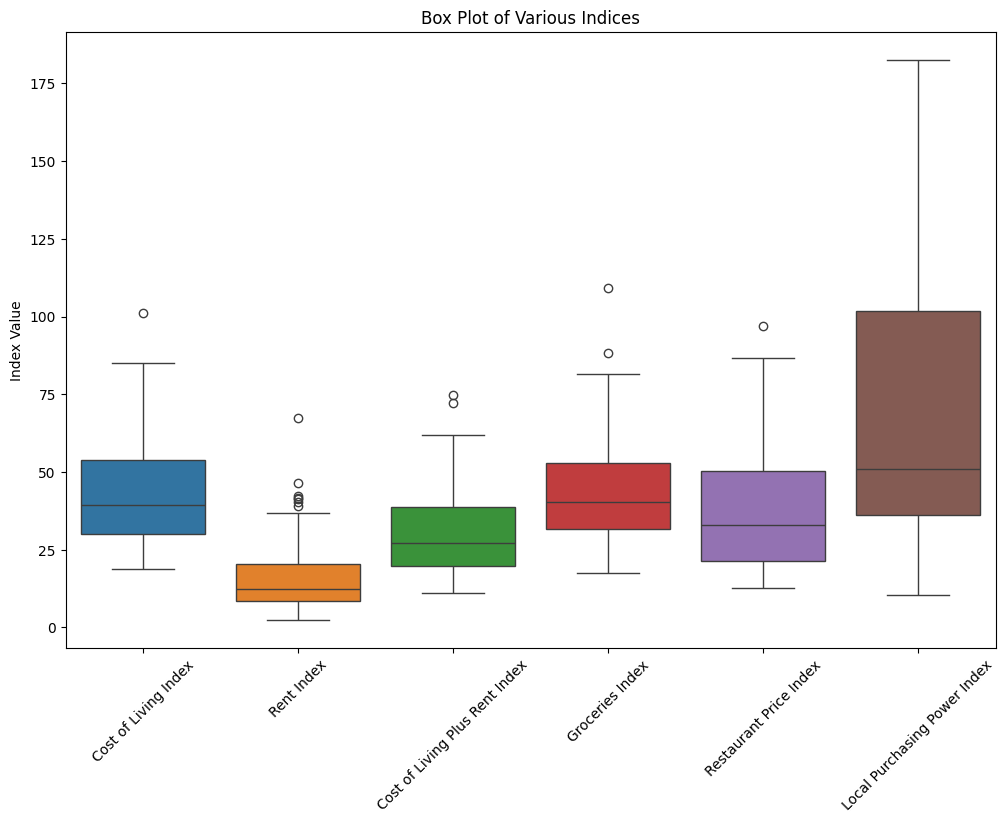

In [10]:
# Box plot of various indices
indices = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[indices])
plt.title('Box Plot of Various Indices')
plt.ylabel('Index Value')
plt.xticks(rotation=45)
plt.show()

* This plot supports the already known idea that Cost of Living can be viewed as a consequence of other basic necessity prices - rent, groceries, restaurant, and local purchasing power all tie into the cost of living index, which is noticeable as the cost of living index seems to exist in the middle of the other indices values.

## Focused Analysis
As the primary objective of this project is to hone in on the countries existing as outliers, we can utilize python to extract such outliers and observe them more closely. To do this, we examine countries that are greater than or equal to the 75th percentile in Cost of Living Index while still being below the average global GDP. 

In [16]:
# Detailed Analysis
# Case studies for specific countries with high costs of living and low GDP per capita

# Example countries
high_cost_low_gdp = df[(df['Cost of Living Index'] >= 54.000000) & (df['GDP per Capita'] < 29415.710221)]

# Display the filtered data
print(high_cost_low_gdp['Country'])



4     Barbados
28     Uruguay
Name: Country, dtype: object


From this extraction, we find two countries that meet the criteria of having a very high Cost of Living Index while still maintaining a sub-average GDP per Capita: Barbados and Uruguay. To further visualize these outliers, we can utilize a scatter plot with the two countries highlighted.

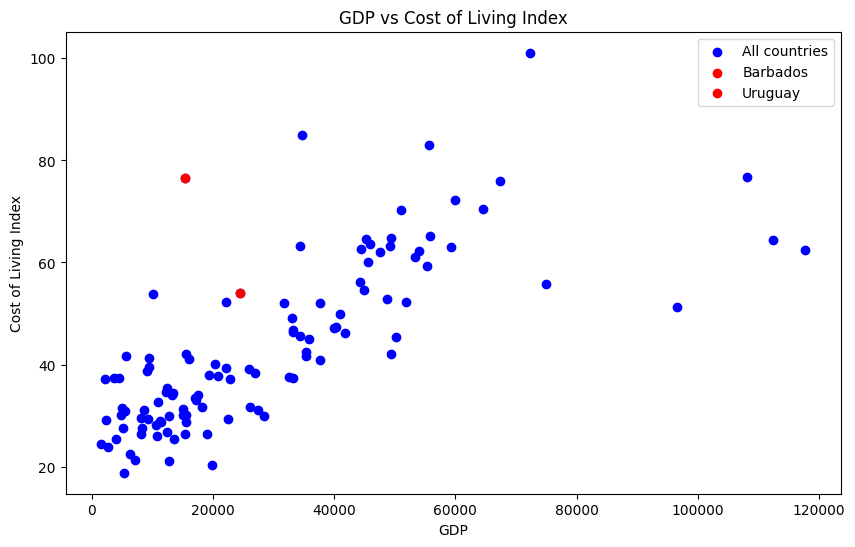

In [14]:
# Define outliers
outliers = ['Barbados', 'Uruguay']

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df['GDP per Capita'], df['Cost of Living Index'], color='blue', label='All countries')

# Highlight outliers
for outlier in outliers:
    outlier_data = df[df['Country'] == outlier]
    plt.scatter(outlier_data['GDP per Capita'], outlier_data['Cost of Living Index'], color='red', label=outlier)

# Add labels and title
plt.xlabel('GDP')
plt.ylabel('Cost of Living Index')
plt.title('GDP vs Cost of Living Index')
plt.legend()

# Show the plot
plt.show()

To show how these outliers compare to the general trend of the dataset, we can plot a regression line ontop of the existing plot.

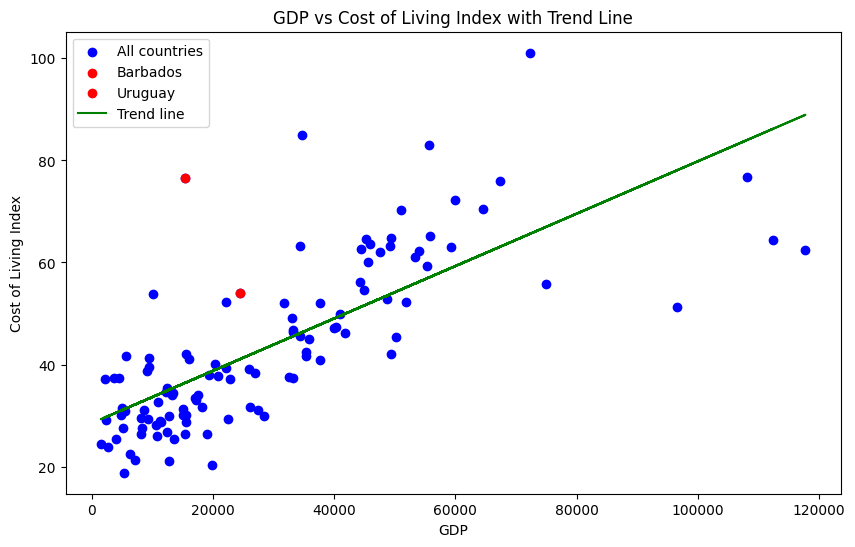

In [19]:
from scipy import stats
# Define outliers
outliers = ['Barbados', 'Uruguay']

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot all points
plt.scatter(df['GDP per Capita'], df['Cost of Living Index'], color='blue', label='All countries')

# Highlight outliers
for outlier in outliers:
    outlier_data = df[df['Country'] == outlier]
    plt.scatter(outlier_data['GDP per Capita'], outlier_data['Cost of Living Index'], color='red', label=outlier)

# Fit a line to the data
slope, intercept, r_value, p_value, std_err = stats.linregress(df['GDP per Capita'], df['Cost of Living Index'])
line = slope * df['GDP per Capita'] + intercept

# Plot the regression line
plt.plot(df['GDP per Capita'], line, color='green', label='Trend line')

# Add labels and title
plt.xlabel('GDP')
plt.ylabel('Cost of Living Index')
plt.title('GDP vs Cost of Living Index with Trend Line')
plt.legend()

# Show the plot
plt.show()

* From this plot, we can see that the outlier closer to the regression line, Uruguay, appears to barely fit our criteria of being an outlier - only slightly meeting the limits for Cost of Living Index and GDP per capita. Barbados, on the other hand, is one of the most extreme outliers in the dataset, having a very high Cost of Living Index with a very low GDP per Capita. 

# Discussion

### Are there outliers in this dataset - do certain countries have low GDPs with very high Cost of Living Index scores?
In this dataset, Barbados and Uruguay are identified as outliers. Both countries have relatively low GDPs but very high Cost of Living Index scores compared to other countries.
* Barbados: With a lower GDP per capita, Barbados has one of the highest cost of living index scores in the dataset, showcasing a major disparity.
* Uruguay, while not as pronounced, still was considered an outlier in the dataset and has a higher cost of living when compared to countries of similar GDPs.

### What are the humanitarian impacts of high costs of living in countries with lower GDP per capita?
High costs of living in countries with lower GDP per capita can have several humanitarian impacts:

* Increased Poverty: Higher living costs can push more people below the poverty line as their incomes may not be sufficient to cover basic needs such as food, housing, healthcare, and education.
* Reduced Access to Essentials: With high costs, access to essential goods and services becomes limited, affecting health, nutrition, and overall quality of life.
* Social Inequality: The gap between the rich and the poor can widen, leading to increased social tensions and instability.


### What are the broader implications for global inequality and human well-being?
The existence of outliers like Barbados and Uruguay highlights broader topics such as global inequality. These outliers indicate that economic growth does not uniformly translate to higher living standards. Structural issues and inefficient distribution of resources can lead to high costs of living even in countries with modest or low GDPs.

Policymakers must address underlying causes of high living costs, such as monopolies or over-dependence on imports to improve living standards for citizens in struggling countries, especially those which have lower GDPs.

These disparities also contribute to global inequality, with certain populations facing significant hardships despite their country's economic status - which could affect global relations and cooperation.


By analyzing the correlation between GDP per capita and the Cost of Living Index,  significant insights into economic disparities can be revealed. Outliers like Barbados and Uruguay highlight the importance of addressing the unique challenges faced by countries with high living costs but lower economic output - and the clear existence of these outliers hopefully pushes policymakers to push for improving the well-being of citizens in their respective countries.